# Assignment 1, Predictive Methods - AVTEK 2025 

Anniina Mäkinen, Jyri Männikkö, Niina Pietilä

## Part 1

### 1.1 Dataset from Kaggle
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download


**Dataset & suitability for kNN**  
- **Dataset:** Wine Quality (WineQT.csv) from Kaggle  
- **Target (y):** `quality`  
- **Why kNN fits:** numeric features; moderate size; labeled target.  
- **What is scikit-learn:** Python ML library with models, splitting and metrics.

In [1]:
import pandas as pd

df = pd.read_csv('WineQT.csv')
X = df.drop(['quality','Id'], axis=1)
y = df['quality']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### 1.2 First kNN run (Training) 


**Goal:** Split 80/20 and train kNN (k=5).

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
(len(X_train), len(X_test))

(914, 229)

### 1.2 First kNN run (Testing)

**Goal:** Evaluate on the test set and visualize the split conceptually.

In [3]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
basic_accuracy = accuracy_score(y_test, y_pred)
basic_accuracy

0.5152838427947598

**Illustration: 80/20 split**

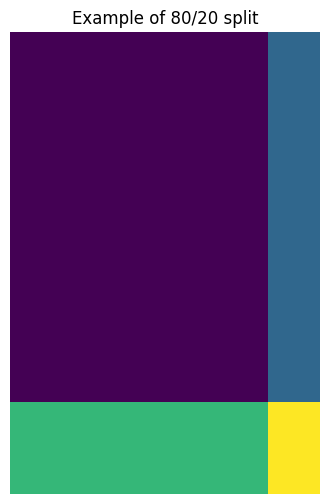

In [4]:
import numpy as np, matplotlib.pyplot as plt

grid = np.zeros((20,6))
grid[:16,:5]=1; grid[:16,5]=2; grid[16:,:5]=3; grid[16:,5]=4
plt.figure(figsize=(4,6)); plt.imshow(grid, aspect='auto'); plt.title('Example of 80/20 split'); plt.axis('off'); plt.show()

### 1.3 Listing of 2 more interresting use cases for kNN algorithm

## Part 2

### 2.1 Experiments with different values of $k$

### 2.2 Studying the effect of different train/test splits

**Task:** Compare different test sizes while keeping k=5.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

split_sizes=[0.2,0.3,0.4]
rows=[]
for s in split_sizes:
    X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=s,random_state=42)
    model=KNeighborsClassifier(n_neighbors=5)
    model.fit(X_tr,y_tr)
    pred=model.predict(X_te)
    rows.append((s,accuracy_score(y_te,pred)))
df_splits=pd.DataFrame(rows,columns=['test_size','accuracy'])
df_splits.sort_values('test_size')

,test_size,accuracy
0,0.2,0.515284
1,0.3,0.495627
2,0.4,0.482533


**Analysis:** larger test shares can increase variance; cross‑validation below is more stable.

### 2.3 $k$-fold validation

**Two real‑world kNN use cases**  
1) Medical triage/diagnosis (nearest patients).  
2) Recommendation hints (nearest users/items).

**Task:** Train multiple `k` and report accuracy.

In [6]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values=[1,3,5,7,9,11,15]
rows=[]
for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    rows.append((k,accuracy_score(y_test,pred)))
df_k=pd.DataFrame(rows,columns=['k','accuracy'])
df_k.sort_values('accuracy',ascending=False)

,k,accuracy
0,1,0.606987
6,15,0.550218
4,9,0.537118
3,7,0.528384
5,11,0.524017
2,5,0.515284
1,3,0.502183


**Analysis:** pick the best `k` by highest test accuracy (prefer moderate `k` on ties).

**Task:** 5‑fold cross‑validation and average accuracy.

In [7]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=[]
for tr,te in kf.split(X):
    X_tr,X_te=X.iloc[tr],X.iloc[te]
    y_tr,y_te=y.iloc[tr],y.iloc[te]
    model=KNeighborsClassifier(n_neighbors=5)
    model.fit(X_tr,y_tr)
    preds=model.predict(X_te)
    scores.append(accuracy_score(y_te,preds))
cv_mean=sum(scores)/len(scores)
cv_mean

0.47769861334559105

**Justification:** 5 folds is a standard default; balances stability and compute.